In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD,Adam
print(tf.__version__ )



2.7.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
import os
working_dir='dataset'
colab_default_dir='/content/gdrive/MyDrive/Colab Notebooks/'
original_dir=os.getcwd()
try:
  os.chdir(colab_default_dir)
  print(str(colab_default_dir))
  if not os.path.exists(working_dir):
    os.mkdir(working_dir)
  os.chdir(working_dir)
  print('current dir = ',os.getcwd())
except Exception as err:
  os.chdir(original_dir)
  print(str(err))




Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks/
current dir =  /content/gdrive/MyDrive/Colab Notebooks/dataset


In [160]:
import numpy as np
import pandas as pd
try:
  loaded_data=np.loadtxt('./diabetes.csv',delimiter=',',skiprows=1)
  #loaded_data=pd.read_csv('./diabete.csv')
  print(loaded_data)
  x_data=loaded_data[:,7:8]
  #x_data=loaded_data[:,0:-6]
  print(x_data[0:5,0:5])
  t_data=loaded_data[:,[-1]] 
  print(t_data[0:5])
  print("x_data  =", x_data)  
  #print("t_data  =", t_data)  
  print("x_data storage =", x_data.shape)  
  print("y_data storage =", t_data.shape)  
except Exception as err:
  print(str(err))

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
[[50.]
 [31.]
 [32.]
 [21.]
 [33.]]
[[1.]
 [0.]
 [1.]
 [0.]
 [1.]]
x_data  = [[50.]
 [31.]
 [32.]
 [21.]
 [33.]
 [30.]
 [26.]
 [29.]
 [53.]
 [54.]
 [30.]
 [34.]
 [57.]
 [59.]
 [51.]
 [32.]
 [31.]
 [31.]
 [33.]
 [32.]
 [27.]
 [50.]
 [41.]
 [29.]
 [51.]
 [41.]
 [43.]
 [22.]
 [57.]
 [38.]
 [60.]
 [28.]
 [22.]
 [28.]
 [45.]
 [33.]
 [35.]
 [46.]
 [27.]
 [56.]
 [26.]
 [37.]
 [48.]
 [54.]
 [40.]
 [25.]
 [29.]
 [22.]
 [31.]
 [24.]
 [22.]
 [26.]
 [30.]
 [58.]
 [42.]
 [21.]
 [41.]
 [31.]
 [44.]
 [22.]
 [21.]
 [39.]
 [36.]
 [24.]
 [42.]
 [32.]
 [38.]
 [54.]
 [25.]
 [27.]
 [28.]
 [26.]
 [42.]
 [23.]
 [22.]
 [22.]
 [41.]
 [27.]
 [26.]
 [24.]
 [22.]
 [22.]
 [36.]
 [22.]

In [161]:
model=Sequential()
model.add(Flatten(input_shape=(x_data.shape[1],)))
model.add(Dense(t_data.shape[1],  activation='sigmoid'))

#model.add(Dense(t_data.shape[1], input_shape=(x_data.shape[1],), activation='sigmoid'))
#model.add(Dense(1, input_shape=(8,), activation='sigmoid'))
#model.add(Dense(t_data.shape[1], input_shape=(5,), activation='sigmoid'))
model.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 1)                 0         
                                                                 
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [162]:
hist=model.fit(x_data,t_data,epochs=200,validation_split=0.2,verbose=1)

Epoch 1/200
20/20 [==============================] - 1s 11ms/step - loss: 1.0804 - accuracy: 0.5358 - val_loss: 1.2206 - val_accuracy: 0.3571
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 1.0737 - accuracy: 0.5423 - val_loss: 0.8876 - val_accuracy: 0.3571
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 0.9824 - accuracy: 0.5717 - val_loss: 0.7148 - val_accuracy: 0.6429
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 0.8716 - accuracy: 0.5489 - val_loss: 1.0821 - val_accuracy: 0.3571
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 0.9103 - accuracy: 0.5651 - val_loss: 1.8402 - val_accuracy: 0.6429
Epoch 6/200
20/20 [==============================] - 0s 4ms/step - loss: 1.0469 - accuracy: 0.5456 - val_loss: 1.3778 - val_accuracy: 0.3571
Epoch 7/200
20/20 [==============================] - 0s 4ms/step - loss: 0.8044 - accuracy: 0.5977 - val_loss: 1.9059 - val_accuracy: 0.6429
Epoch 8/200


In [163]:
model.evaluate(x_data,t_data)

24/24 [==============================] - 0s 2ms/step - loss: 1.2365 - accuracy: 0.3490


[1.2364839315414429, 0.3489583432674408]

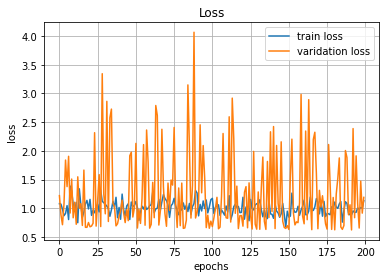

In [164]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='varidation loss')
plt.legend(loc='best')
plt.show()

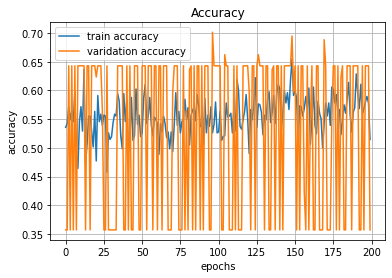

In [165]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.plot()
plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'],label='varidation accuracy')
plt.legend(loc='best')
plt.show()